# General Questions

#1. What data do you have?

This dataset contains survery responses from students in CS105, CS111, and CS010C. 

#2. What would you like to know?  
  
The data we have answers our topic: 'How Work Affects Study Habits and Stress in College Students. We would like to understand how different work schedules affect students' study habits and academic outcomes. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import spearmanr

Load Dataset

In [3]:
data = pd.read_csv("G:\My Drive\Fall 2024\CS 105\Labs\Mini Project (Lab 5-6)\CS105 F24 Mini-Project Survey (Responses) NEW.csv")
q1 = pd.read_csv("G:\My Drive\Fall 2024\CS 105\Labs\Mini Project (Lab 5-6)\Q1.csv")

# Visualizations

Create A Stacked Bar Chart to show relationship between "How many hours a week do you spend studying?" and "How much do you agree with this statement: 'My grades would be better if I could study more instead of having to work?'"

C:\Users\aliei\AppData\Local\Temp\ipykernel_17920\398234227.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  study_agreement_counts = data.groupby([study_hours_col, agreement_col]).size().unstack().fillna(0)


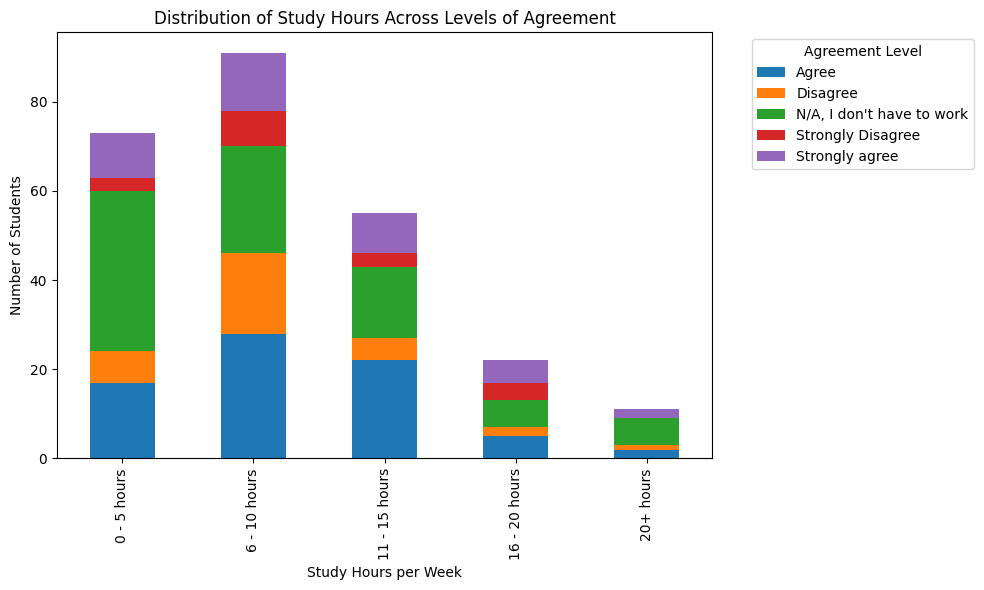

In [7]:
study_hours_col = "How many hours a week do you spend studying?"
agreement_col = "How much do you agree with this statement: \"My grades would be better if I could study more instead of having to work?\""

study_hours_order = ["0 - 5 hours", "6 - 10 hours", "11 - 15 hours", "16 - 20 hours", "20+ hours"]
data[study_hours_col] = pd.Categorical(data[study_hours_col], categories=study_hours_order, ordered=True)

study_agreement_counts = data.groupby([study_hours_col, agreement_col]).size().unstack().fillna(0)

study_agreement_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Study Hours Across Levels of Agreement')
plt.xlabel('Study Hours per Week')
plt.ylabel('Number of Students')
plt.legend(title='Agreement Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

This stacked bar chart displays the relationship between the number of hours students spend studying per week and how they agree with the following statement: "My grades would be better if I could study more instead of having to work?".


The x-axis represents hour spent studying per week and the y-axis represents the number of students that fall in to each hour range. Around 60 students reported that they study between 0-5 hours per week. In this range, the most frequent statement agreement level was 2, followed by a 0. The next range of 6-10 hours has the highest number of level 4 statement agreements. This range also has the highest number of responses in general so we can establish that most students in our population sample study between 6-10 hours a week.


The remaining hour ranges all have fewer responses and they all have an agreement level of 2 for the most common response. From this graph we can conclude that students who study less due to work share the sentiment that they aren't performing as good as they could be.


Stacked Bar Chart between Agreement Level and AI Usage frequency

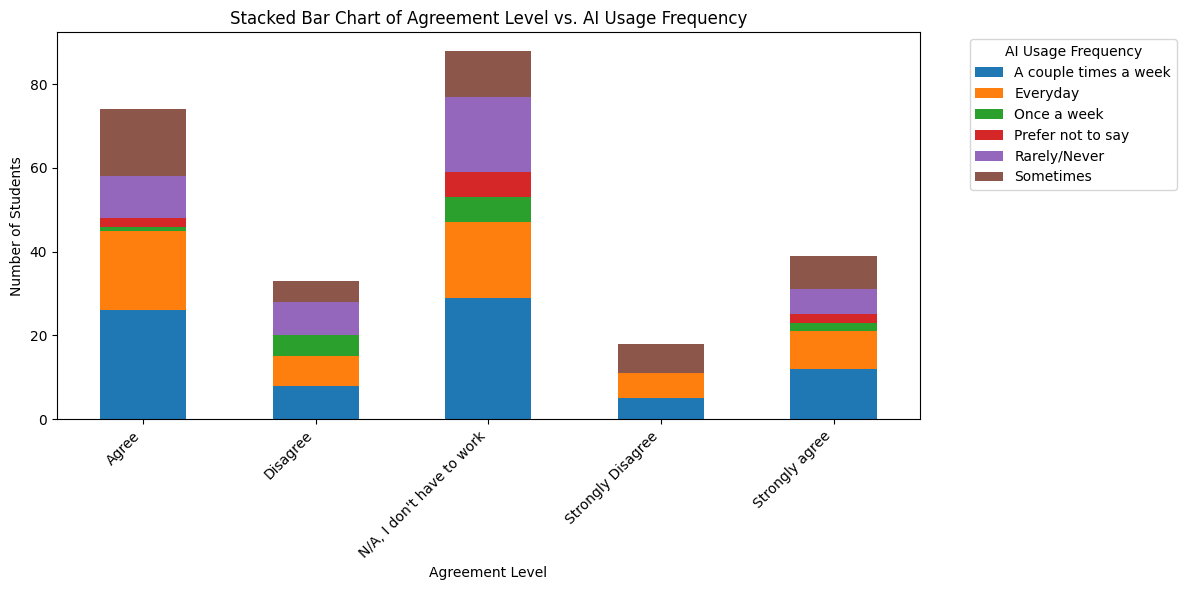

In [ ]:
agreement_level_col = "How much do you agree with this statement: \"My grades would be better if I could study more instead of having to work?\""
ai_usage_frequency_col = "How frequently do you use ChatGPT or other AI language models?"

agreement_ai_counts = pd.crosstab(data[agreement_level_col], data[ai_usage_frequency_col])

agreement_ai_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Stacked Bar Chart of Agreement Level vs. AI Usage Frequency')
plt.xlabel('Agreement Level')
plt.ylabel('Number of Students')
plt.xticks(rotation=45, ha='right')
plt.legend(title='AI Usage Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

This stacked bar chart shows the relationship between how often students use AI tools and how they agree with the following statement: "My grades would be better if I could study more instead of having to work?"


The x-axis represents agreement levels to the statement while the y-axis represents the number of students that responded to each agreement level. Bars are split into varying usage frequencies of AI tools that sum up to the total number of responses to the agreement level they represent.


The first agreement level is "agree". In this bar we can see that students reported using AI tools "a couple of times a week" the most, followed closely by "everyday".
We can also see that students who reported not having to work also seem to use AI tools everyday similar to students who agreed with the statement. This gives the impression that having to work has no definite impact on students tendency to use AI tools.



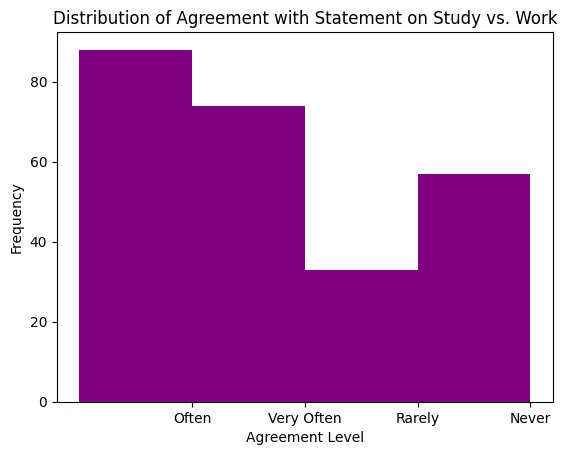

In [14]:
agreement_col = "How much do you agree with this statement: \"My grades would be better if I could study more instead of having to work?\""

plt.hist(data[agreement_col], bins=4, color='purple')

plt.title("Distribution of Agreement with Statement on Study vs. Work")
plt.xlabel("Agreement Level")
plt.ylabel("Frequency")
plt.xticks(ticks=[1, 2, 3, 4], labels=['Often', 'Very Often', 'Rarely', 'Never'])  
plt.show()

The graph is a histogram of the students who answered the question “How often do you feel stressed about completing an assignment?” The x-axis shows the response choices: ‘rarely’, ‘often’, ‘very often’, and ‘very often.’ The y-axis shows the frequency of the responses.  Out of 142 responses of the survey, 30 chose very often, 120 chose often, 88 chose rarely, and 4 chose never. From the data we have collected, it shows that students often feel stressed about completing an assignment.

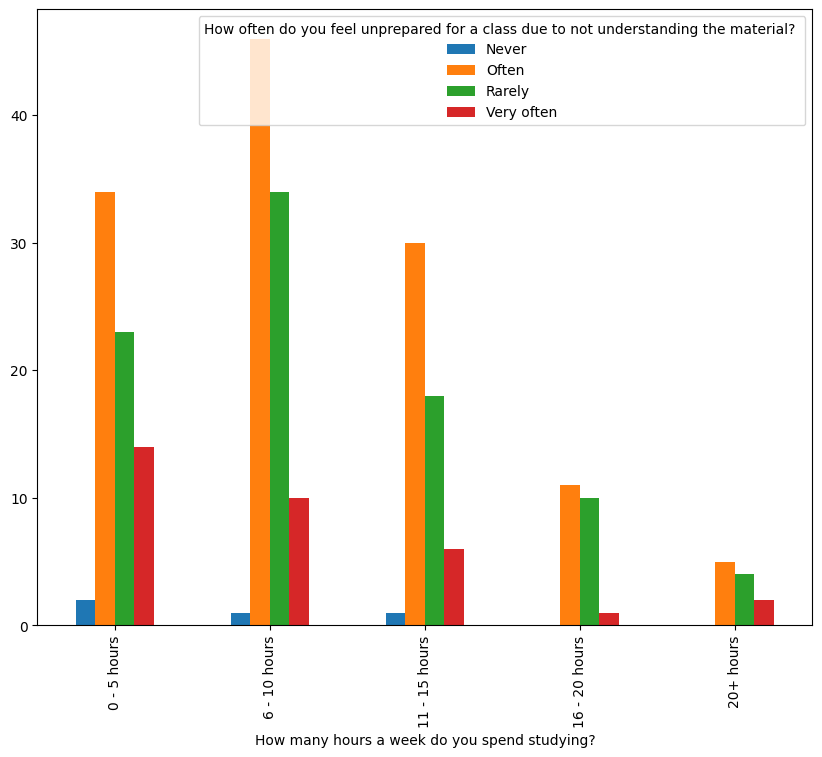

In [9]:
Study = "How many hours a week do you spend studying?"
Understand = "How often do you feel unprepared for a class due to not understanding the material? "

Hours = ["0 - 5 hours", "6 - 10 hours", "11 - 15 hours", "16 - 20 hours", "20+ hours"]
data[Study] = pd.Categorical(data[Study], categories=Hours, ordered=True)

Work = data.groupby([Study, Understand], observed=False).size().unstack().fillna(0)

Work.plot(kind='bar', figsize=(10, 8))
plt.show()

This bar chart shows the relationship between the number of hours students spend studying a week and how often they feel unprepared for class due to not understanding the material. 


The  x-axis represents the number of hours students studied per week and group the students that chose those options and the y-axis represents the number of students that feel unprepared for class due to not understanding the material.


In conclusion, we could see that students that have more time to study tend to feel less unprepared and those students that have more time to study.

Stacked Bar Chart to see Agreement Level and AI usage Types

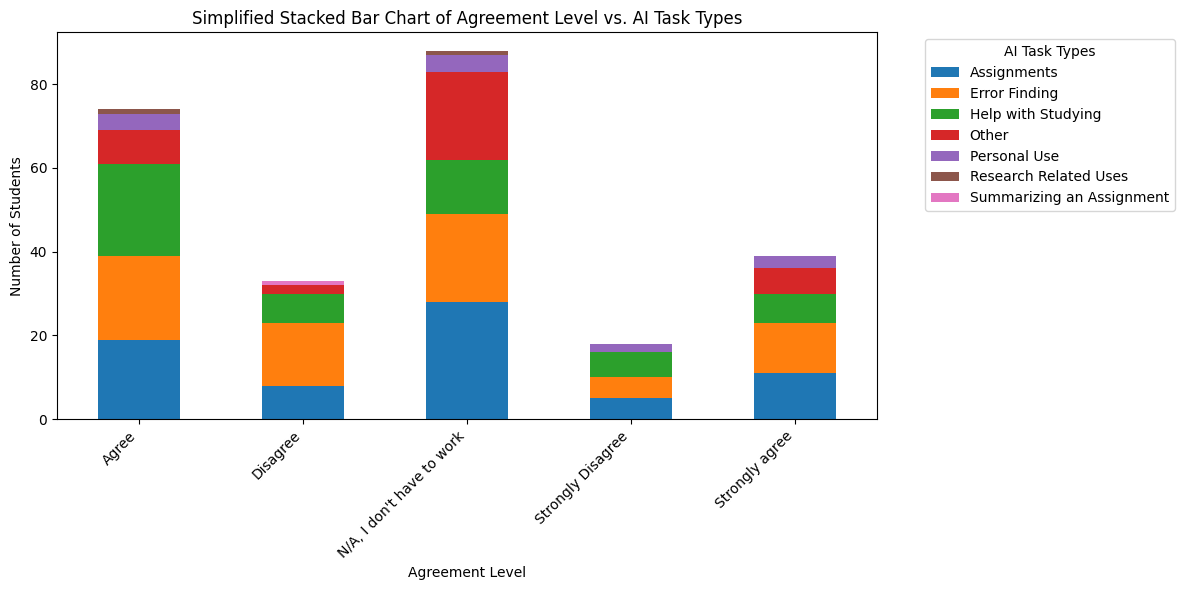

In [ ]:
ai_usage_tasks_col = "What types of tasks do you normally use ChatGPT or another AI language model to complete?"
agreement_level_col = "How much do you agree with this statement: \"My grades would be better if I could study more instead of having to work?\""

def simplify_ai_tasks(task):
    if "Assignments" in task:
        return "Assignments"
    elif "Error-finding" in task:
        return "Error Finding"
    elif "Help with Studying" in task:
        return "Help with Studying"
    elif "Personal Use" in task:
        return "Personal Use"
    elif "Research-related" in task:
        return "Research Related Uses"
    elif "Summarizing an assignment" in task:
        return "Summarizing an Assignment"
    else:
        return "Other"

data['Simplified AI Task Types'] = data[ai_usage_tasks_col].apply(simplify_ai_tasks)

simplified_agreement_tasks_counts = pd.crosstab(data[agreement_level_col], data['Simplified AI Task Types'])

simplified_agreement_tasks_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Simplified Stacked Bar Chart of Agreement Level vs. AI Task Types')
plt.xlabel('Agreement Level')
plt.ylabel('Number of Students')
plt.xticks(rotation=45, ha='right')
plt.legend(title='AI Task Types', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

This stacked bar chart shows the relationship between what students use AI tools for and how they agree with the following statement: "My grades would be better if I could study more instead of having to work?"


Similar to the previous stacked bar chart, the x-axis represents agreement levels to the statements while the y-axis represents the number of students that responded to each agreement level.


Here we can see that students who don't work tend to use AI tools for assignments the most while students who feel like working is having a negative impact on their grades use it mainly for error finding. We can connect this to the fact that our population sample includes only students from CS classes. In fact, in all other agreement levels we can see that error finding is the most frequent use for AI tools in our population sample.


Create A Heatmap to see if students that spend more time doing Extracurriculars (Work, club, etc.) Use AI More

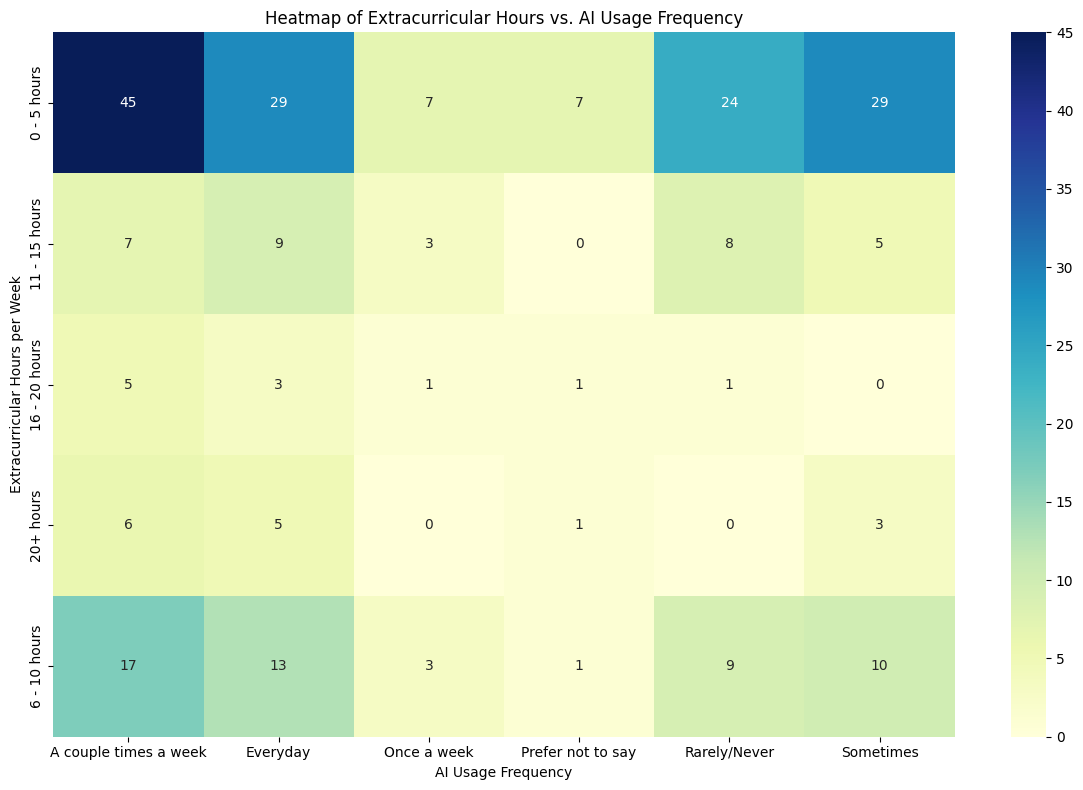

In [111]:
extracurricular_hours_col = "How many hours a week do you spend on all extracurriculars (work, clubs, research, sports, etc.)? "
ai_usage_frequency_col = "How frequently do you use ChatGPT or other AI language models?"

heatmap_data = pd.crosstab(data[extracurricular_hours_col], data[ai_usage_frequency_col])

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Heatmap of Extracurricular Hours vs. AI Usage Frequency")
plt.xlabel("AI Usage Frequency")
plt.ylabel("Extracurricular Hours per Week")
plt.tight_layout()
plt.show()

In this heatmap we can see the relationship between the frequency of students' usage of AI tools and their hours spent on extra curriculars. The goal with this heatmap is to see if time spent not studying influences more frequent usage of AI tools to supplement time lost with class material. However, we can see that students that spend the least amount of that on extra curriculars actually use AI tools the most when looking at the "Everyday" responses.


When looking at students that spend the most time on extra curriculars, the category with the most responses is tied between "A couple times a week" and "Everyday". This tells us that even students who spend the most time doing extra curriculars don't use AI tools as often as students that spend the least time on extra curriculars.


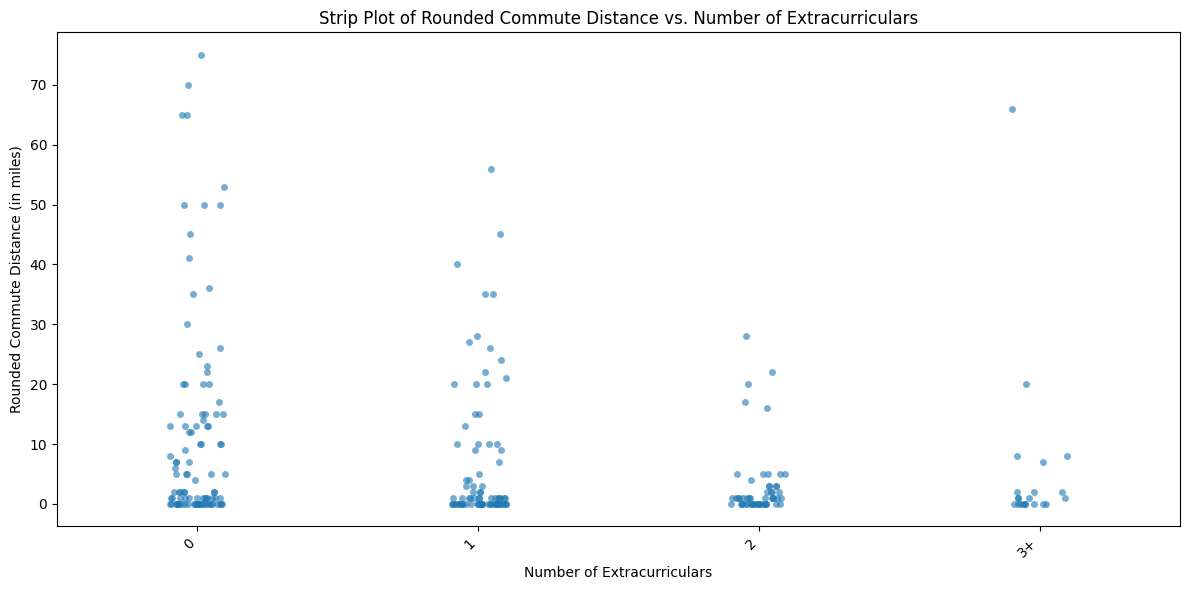

In [112]:
commute_distance_col = "How far is your commute to UCR (in miles)?"
extracurriculars_col = "How many campus clubs/organizations are you involved in? "

data[commute_distance_col] = pd.to_numeric(data[commute_distance_col], errors='coerce')

data[commute_distance_col] = np.round(data[commute_distance_col]).fillna(0).astype(int)

data[extracurriculars_col] = data[extracurriculars_col].astype(str)
unique_values = data[extracurriculars_col].unique()

sorted_values = sorted(unique_values, key=lambda x: int(x) if x.isdigit() else float('inf'))

data[extracurriculars_col] = pd.Categorical(data[extracurriculars_col], categories=sorted_values, ordered=True)

plt.figure(figsize=(12, 6))
sns.stripplot(x=data[extracurriculars_col], y=data[commute_distance_col], jitter=True, alpha=0.6)
plt.title('Strip Plot of Rounded Commute Distance vs. Number of Extracurriculars')
plt.xlabel('Number of Extracurriculars')
plt.ylabel('Rounded Commute Distance (in miles)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


This plot shows the number of extracurriculars a student takes along with the commute the student has in miles. From this graph it shows that students who are in fewer extracurriculars tend to live farther from campus compared to those who take more. 

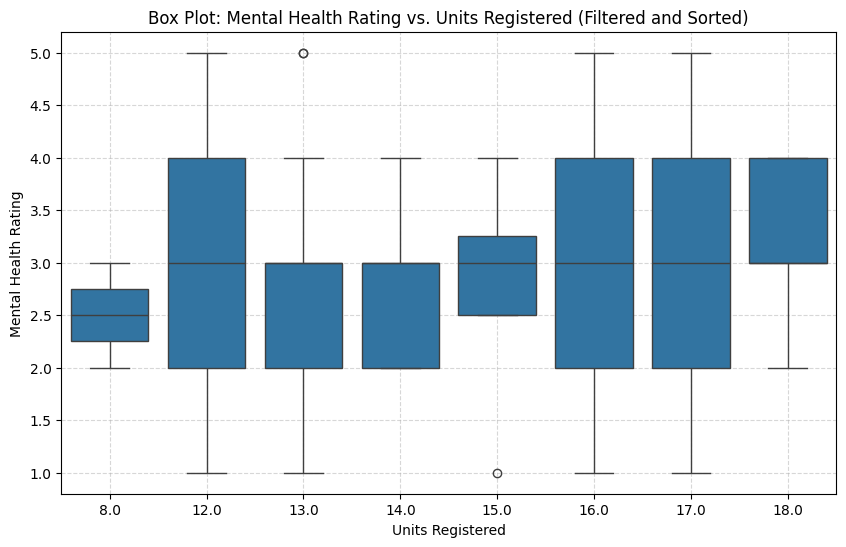

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

data.columns = data.columns.str.strip()

mental_health_column = 'Rate your overall mental health.'
units_column = 'How many units are you registered for this quarter?'

data[units_column] = data[units_column].replace('17 units', 17)
data[units_column] = data[units_column].replace('16 units', 16)
data[units_column] = pd.to_numeric(data[units_column], errors='coerce')

units_to_remove = [9, 16.5, 17.5, 19, 20, 21, 22]
data = data[~data[units_column].isin(units_to_remove)]

unique_units = sorted(data[units_column].dropna().unique())

plt.figure(figsize=(10, 6))
sns.boxplot(x=data[units_column], y=data[mental_health_column], order=unique_units)
plt.title('Box Plot: Mental Health Rating vs. Units Registered (Filtered and Sorted)')
plt.xlabel('Units Registered')
plt.ylabel('Mental Health Rating')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

This box plot graph shows how students with different amount of classes in units rate their mental health state on average. Responses of the students who are enrolled in 12, 16, and 17 units this semester rate their mental health in a full range from 1 to 5 with a mean value of 3. Students with 18 units rate mental health in the range from 2 to 4 with a tendency towards 4. Students with 14 units rate mental health in the range from 2 to 4 with a tendency towards 2. Students with 15 units rate mental health in the range from 2.5 to 4 with a tendency towards 2.5 and a mean of 3. Students with 13 units rate mental health in a range from 1 to 4 with an average in a range from 2 to 3. Students enrolled in 8 units rate their mental health from 2 to 3 with a mean value of 2.5


Conclusions: Students who have other commitments and enrolled in a lower amount of units rate mental health lower on average. At the same time students with higher amounts of coursework rate their mental health higher.


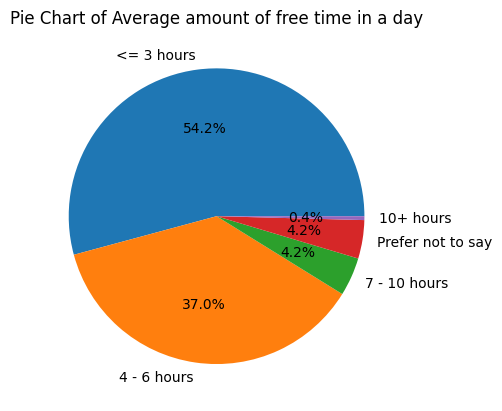

In [120]:
freeHoursQuestion = 'How much free time would you say you have a day on average?'
freeHours = ['<=3 hours', '4-6 hours', '7-10 hours', '10+ hours']

freeHourscounts = data[freeHoursQuestion].value_counts()

plt.pie(freeHourscounts, labels=freeHourscounts.index, autopct='%1.1f%%')

plt.title('Pie Chart of Average amount of free time in a day')

plt.show()

54% of students have less than 3 hours of free time on average per day. 37% of students have from 4 to 6 hours of free time on average. Very low percentage of students have more than 7 hours of free time.


Conclusion: Most of the students don’t have any free time.


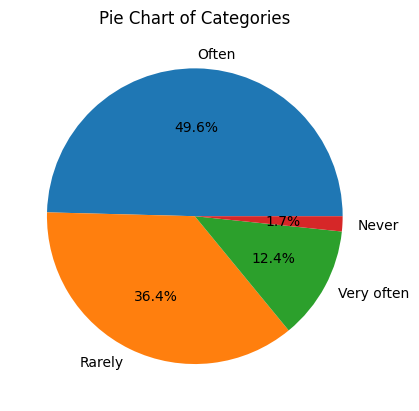

In [9]:
category_counts = q1['answer1'].value_counts().reset_index()
category_counts.columns = ['Category', 'Value']


plt.pie(category_counts['Value'], labels=category_counts['Category'], autopct='%1.1f%%')
plt.title('Pie Chart of Categories')
plt.show()

This graph is a pie chart of the question response to “ How often do you feel stressed about completing an assignment?” The different slices of the pie are the count of the responses 49.6% of the responses answered often, 1.7% of the responses chose Never, 12.4% of the responses chose very often, and 36.4% of the responses chose rarely. From the data we collected, it shows that the students often feel stress about completing an assignment.


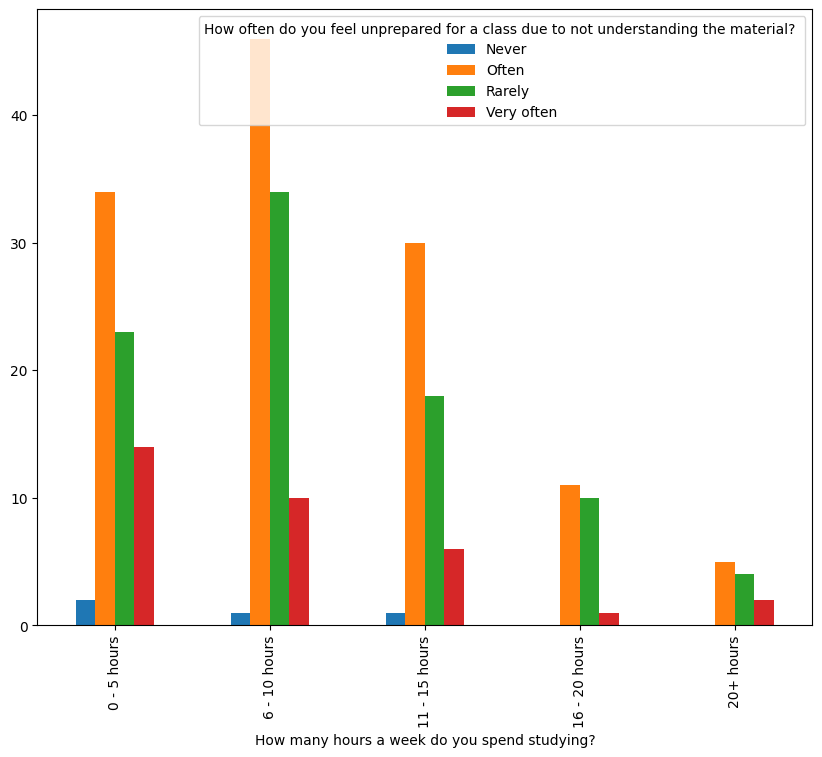

In [12]:
Study = "How many hours a week do you spend studying?"
Understand = "How often do you feel unprepared for a class due to not understanding the material? "

Hours = ["0 - 5 hours", "6 - 10 hours", "11 - 15 hours", "16 - 20 hours", "20+ hours"]
data[Study] = pd.Categorical(data[Study], categories=Hours, ordered=True)

Work = data.groupby([Study, Understand], observed=False).size().unstack().fillna(0)

Work.plot(kind='bar', figsize=(10, 8))
plt.show()

This bar chart shows the relationship between the number of hours students spend studying a week and how often they feel unprepared for class due to not understanding the material. 


The  x-axis represents the number of hours students studied per week and group the students that chose those options and the y-axis represents the number of students that feel unprepared for class due to not understanding the material. It shows that students that study for 6-10 Hours feel more unprepared more often than those that studied 0-5 Hours. The remaining options show a decline for students feeling unprepared the more they study. 


In conclusion, we could see that students that have more time to study tend to feel less unprepared and those students that have more time to study. 


# Hypothesis Tests

Hypothesis #1: Test indendency between "My grades would be better if I could study more instead of having to work?" and "What types of tasks do you normally use ChatGPT or another AI language model to complete?"  

Chi Square Test to see the independency between Agreement Level and AI Usage Frequency

In [113]:
contingency_table = pd.crosstab(data[ai_usage_frequency_col], data[agreement_level_col])

chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("Chi-Square Test Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:\n", expected)

Chi-Square Test Statistic: 27.408442238614892
P-value: 0.12415889596226652
Degrees of Freedom: 20
Expected Frequencies Table:
 [[23.49206349 10.47619048 27.93650794  5.71428571 12.38095238]
 [17.32539683  7.72619048 20.6031746   4.21428571  9.13095238]
 [ 4.11111111  1.83333333  4.88888889  1.          2.16666667]
 [ 2.93650794  1.30952381  3.49206349  0.71428571  1.54761905]
 [12.33333333  5.5        14.66666667  3.          6.5       ]
 [13.8015873   6.1547619  16.41269841  3.35714286  7.27380952]]


We set the significance level at 0.05, since it is above that, we fail to reject the null hypothesis. There is no significant evidence to suggest a statistically significant relationship between AI usage frequency and agreement with the statement about grades being affected by work.

The results indicate that AI usage frequency and the level of agreement about work affecting grades appear to be independent of each other.

Hypothesis #2: Test independence between "How many hours a week do you spend on all extracurriculars (work, clubs, research, sports, etc.)?" and "How many hours a week do you spend studying?"  

Chi Square Test to see independence between hours spent on extracurriculars per week and hours spent studying per week

In [114]:
extracurricular_hours_col = "How many hours a week do you spend on all extracurriculars (work, clubs, research, sports, etc.)? "
study_hours_col = "How many hours a week do you spend studying?"

contingency_table = pd.crosstab(data[extracurricular_hours_col], data[study_hours_col])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Test Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:\n", expected)

Chi-Square Test Statistic: 16.774417210896868
P-value: 0.40033765925160975
Degrees of Freedom: 16
Expected Frequencies Table:
 [[40.8452381  50.91666667 30.77380952 12.30952381  6.1547619 ]
 [ 9.26984127 11.55555556  6.98412698  2.79365079  1.3968254 ]
 [ 3.18650794  3.97222222  2.40079365  0.96031746  0.48015873]
 [ 4.3452381   5.41666667  3.27380952  1.30952381  0.6547619 ]
 [15.3531746  19.13888889 11.56746032  4.62698413  2.31349206]]


We set the significance level at 0.05, since it is above that, we fail to reject the null hypothesis. There is no significant evidence to suggest a statistically significant relationship between hours spent on extracurriculars per week and hours sepnt studying per week.

The results indicate that hours spent on extracurriculars and hours spent studying per week appear to be independent of each other.

Hypothesis #3: Test Correlation between "How much do you agree with this statement: 'My grades would be better if I could study more instead of having to work?'" and "How often do you feel unprepared for a class due to not understanding the material?"

Correlation test to see correlation between those who would like to study more instead of having to work and how ofthen they feel unprepared for a class due to not understanding the material.

In [115]:
agreement_level_col = "How much do you agree with this statement: \"My grades would be better if I could study more instead of having to work?\""
unprepared_col = "How often do you feel unprepared for a class due to not understanding the material? "

data[agreement_level_col] = data[agreement_level_col].astype('category').cat.codes
data[unprepared_col] = data[unprepared_col].astype('category').cat.codes

correlation_coefficient, p_value = spearmanr(data[agreement_level_col], data[unprepared_col])

print("Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

Correlation Coefficient: 0.019575533567191036
P-value: 0.7571415243299245


We set the significance level at 0.05, it is above that, we fail to reject the null hypothesis. There is no significant evidence to support if there is a meaningful correlation between those who would like to study more instead of having to work and how ofthen they feel unprepared for a class due to not understanding the material.

The results indicate that there is not a strong correlation.

Hypothesis #4: Test correlation between "How much do you agree with this statement: 'My grades would be better if I could study more instead of having to work?'" and "How often do you feel stressed about completing an assignment?"  

Correlation test to see correlation between those who would like to study more instead of having to work and how often they feel stressed about completing an assignment.

In [116]:
agreement_level_col = "How much do you agree with this statement: \"My grades would be better if I could study more instead of having to work?\""
stressed_col = "How often do you feel stressed about completing an assignment?"

data[agreement_level_col] = data[agreement_level_col].astype('category').cat.codes
data[stressed_col] = data[stressed_col].astype('category').cat.codes

correlation_coefficient, p_value = spearmanr(data[agreement_level_col], data[stressed_col])

print("Spearman Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

Spearman Correlation Coefficient: -0.06894143813719485
P-value: 0.2755950805915352


We set the significance level at 0.05, it is above that, we fail to reject the null hypothesis. There is no significant evidence to support if there is a meaningful correlation between those who would like to study more and how often they feel stressed about completing an assignment.

The results indicate there is not a strong correlation

# Conclusion

Our analysis found that there is no significant relationships between work related variables such as hours spent on extracurriculars, study habits, AI usage, or stress levels. This suggests that working may not have a direct impact on a student's academic outcome as we predicted.

# Contribution

Ali Syed: Created the visualizations related to AI Usage, and Frequency along with testing the hypotheses.

William Dang: Searched for appropriate graphs to use, and created visualizations based on hours spent studying

Javier Vargas: Helped determine which graph would be appropriate for the variables we needed, along with making the description and analysis for the visualizations

Sarah Pun: Created descriptions and visualization analysis along with visualizations based on student stress on completing assignments

Arsenii Vasilev: Analyzed the hypotheses along with helping make the overall conclusion along with creating visualizations regarding student mental health